In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [11]:
train_df =  pd.read_csv('train.csv')
test_df = pd.read_csv('holdout_test.csv')

In [12]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
test_df.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,NaN,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,NaN,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,NaN,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,NaN,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
#Checking for any null values (% of missing values)
missing_values=train_df.isnull().sum().sort_values(ascending=False)*100/len(train_df)
missing_values = pd.DataFrame(missing_values,columns = ['Missing_Percent'])
#missing_values=train_df.apply(lambda x: x.isnull().sum()*100/len(train_df))
missing_values_test=test_df.isnull().sum().sort_values(ascending=False)*100/len(test_df)
missing_values_test = pd.DataFrame(missing_values_test,columns = ['Missing_Percent'])

In [15]:
missing_values_test.head(10)

,Missing_Percent
Survived,100.000000
Cabin,78.229665
Age,20.574163
Fare,0.239234
PassengerId,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
SibSp,0.000000
Parch,0.000000


In [16]:
# Drops the unnecessary column
train_df = train_df.drop(columns='Cabin', axis=1)


In [17]:
test_df = test_df.drop(columns='Cabin', axis=1)

In [18]:
# Fill the null values with mean values
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)

In [19]:
# Fill the null values with mean values

test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

In [20]:
# Check the mode of the column
train_df['Embarked'].mode()
test_df['Embarked'].mode()

0    S
dtype: object

In [21]:
# Fill the null values with mode values
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

In [22]:
#Creating a new column Family size :
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_Size'] = test_df['SibSp'] + test_df['Parch'] + 1

In [23]:
#Creating is_alone column to check if the passenger is alone or with family
train_df['is_alone'] = 0
train_df.loc[train_df['Family_Size']==1, 'is_alone'] = 1
test_df['is_alone'] = 0
test_df.loc[test_df['Family_Size']==1, 'is_alone'] = 1

In [24]:
train_df = train_df.drop(['SibSp','Parch'], axis=1)
test_df = test_df.drop(['SibSp','Parch'], axis=1)

In [25]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_Size,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1,1


In [26]:
# Print's the unique value in the column
print(train_df['Pclass'].unique())
print(train_df['Sex'].unique())
print(train_df['Family_Size'].unique())
print(train_df['Embarked'].unique())

[3 1 2]
['male' 'female']
[ 2  1  5  3  7  6  4  8 11]
['S' 'C' 'Q']


In [27]:
# Gives the stastistical measures
train_df.describe()

,PassengerId,Survived,Pclass,Age,Fare,Family_Size,is_alone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208,1.904602,0.602694
std,257.353842,0.486592,0.836071,13.002015,49.693429,1.613459,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,7.910400,1.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,14.454200,1.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,31.000000,2.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200,11.000000,1.000000


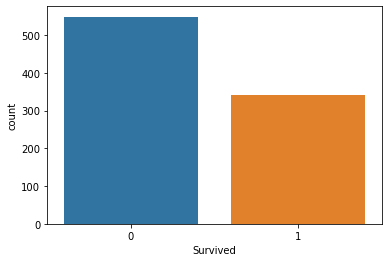

0    0.616162
1    0.383838
Name: Survived, dtype: float64


In [28]:
# Visualize with a countplot
sns.countplot(x="Survived", data=train_df)
plt.show()

# Print the proportions
print(train_df["Survived"].value_counts(normalize=True))

C:\Users\vidis\anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


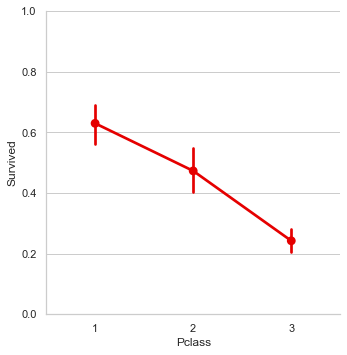

In [29]:
# Visualize with a countplot
sns.set(style="whitegrid")
g = sns.PairGrid(data=train_df, x_vars=['Pclass'], y_vars='Survived', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, 1))

C:\Users\vidis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vidis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


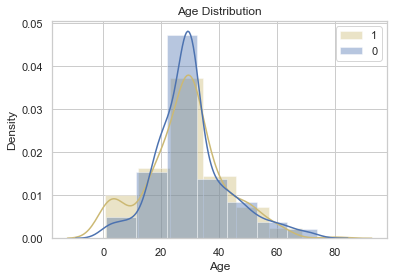

In [30]:
# Survived by age
sns.distplot(train_df[train_df.Survived==1]["Age"],color="y", bins=7, label="1")

# Death by age
sns.distplot(train_df[train_df.Survived==0]["Age"], bins=7, label="0")
plt.legend()
plt.title("Age Distribution")
plt.show()

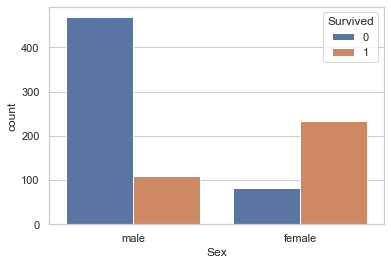

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
male      577
female    314
Name: Sex, dtype: int64


In [31]:
# Visualize with a countplot
sns.countplot(x="Sex", hue="Survived", data=train_df)
plt.show()

# Proportion of people survived for each class
print(train_df["Survived"].groupby(train_df["Sex"]).mean())

# How many people we have in each class?
print(train_df["Sex"].value_counts())

In [32]:
def age_category(row):
    """
    Function to transform the actual age in to an age category
    Thresholds are deduced from the distribution plot of age
    """
    if row < 12:
        return 'children'
    if (row >= 12) & (row < 60):
        return 'adult'
    if row >= 60:
        return 'senior'
    else:
        return 'no age'

# apply the function age_category to each row of the dataset
train_df['Age_category'] = train_df['Age'].apply(lambda row: age_category(row))
test_df['Age_category'] = test_df['Age'].apply(lambda row: age_category(row))

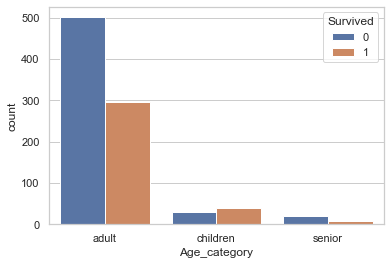

KeyError: 'Age_Category'

In [33]:
# Visualize with a countplot
sns.countplot(x="Age_category", hue="Survived", data=train_df)
plt.show()

# Proportion of people survived for each class
print(train_df["Survived"].groupby(train_df['Age_Category']).mean())


In [34]:
# Group the Ticket column
def assign_label_ticket(first):
    if first in ["F", "1", "P", "9"]:
        return "Ticket_high"
    elif first in ["S", "C", "2"]:
        return "Ticket_middle"
    else:
        return "Ticket_low"
# Ticket
train_df["Ticket"] = train_df["Ticket"].apply(assign_label_ticket)
test_df["Ticket"] = test_df["Ticket"].apply(assign_label_ticket)

In [35]:
# Give's the correlation table
train_df.corr()

,PassengerId,Survived,Pclass,Age,Fare,Family_Size,is_alone
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658,-0.040143,0.057462
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307,0.016639,-0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500,0.065997,0.135207
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512,0.179775
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000,0.217138,-0.271832
Family_Size,-0.040143,0.016639,0.065997,-0.248512,0.217138,1.000000,-0.690922
is_alone,0.057462,-0.203367,0.135207,0.179775,-0.271832,-0.690922,1.000000


<AxesSubplot:>

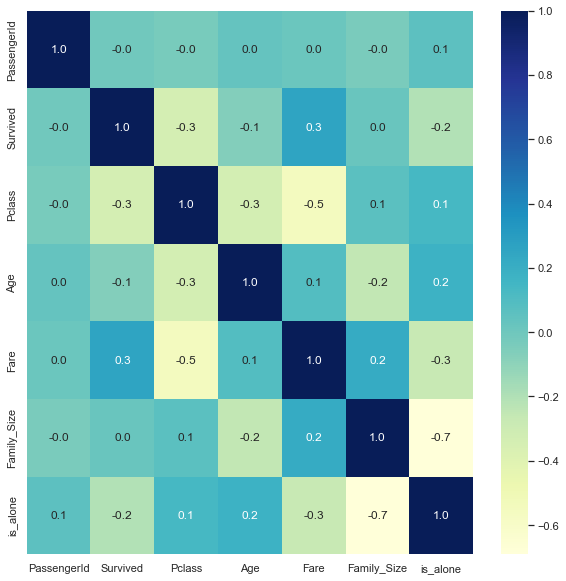

In [36]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(), annot=True, cbar=True, cmap='YlGnBu', fmt='.1f')

In [37]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_Size,is_alone,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,Ticket_low,7.2500,S,2,0,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,Ticket_low,71.2833,C,2,0,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,Ticket_low,7.9250,S,1,1,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,Ticket_low,53.1000,S,2,0,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,Ticket_low,8.0500,S,1,1,adult


In [38]:
test_df.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_Size,is_alone,Age_category
0,NaN,892,3,"Kelly, Mr. James",male,34.5,Ticket_low,7.8292,Q,1,1,adult
1,NaN,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,Ticket_low,7.0000,S,2,0,adult
2,NaN,894,2,"Myles, Mr. Thomas Francis",male,62.0,Ticket_low,9.6875,Q,1,1,senior
3,NaN,895,3,"Wirz, Mr. Albert",male,27.0,Ticket_low,8.6625,S,1,1,adult
4,NaN,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,Ticket_low,12.2875,S,3,0,adult


In [39]:
# Initialize a Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encode Sex
train_df["Sex"] = le.fit_transform(train_df[["Sex"]].values.ravel())
test_df["Sex"] = le.fit_transform(test_df[["Sex"]].values.ravel())

In [40]:
#rounding fare to 2 decimals
train_df['Fare'] = round(train_df['Fare'], 2)
test_df['Fare'] = round(test_df['Fare'], 2)

In [41]:
train = pd.get_dummies(columns=["Pclass", "Embarked", "Ticket", "Age_category", "is_alone"], data=train_df, drop_first=True)
test = pd.get_dummies(columns=["Pclass", "Embarked", "Ticket", "Age_category", "is_alone"], data=test_df, drop_first=True)

In [42]:
#Drop the colums that are no longer needed
target = train["Survived"]
train.drop(["Survived", "Name", "PassengerId"], axis=1, inplace=True)
test.drop(["Survived","Name","PassengerId"], axis=1, inplace=True)

In [44]:
from sklearn.preprocessing import MinMaxScaler 
#Scaling the data
features_list = [e for e in train
                        .columns]
scaler = MinMaxScaler()
train[features_list] = scaler.fit_transform(train[features_list])
test[features_list] = scaler.fit_transform(test[features_list])

In [45]:
train.head()

,Sex,Age,Fare,Family_Size,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Age_category_children,Age_category_senior,is_alone_1
0,1.0,0.271174,0.014151,0.1,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.472229,0.139129,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.321438,0.015459,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.434531,0.103644,0.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [46]:
test.head()

,Sex,Age,Fare,Family_Size,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Age_category_children,Age_category_senior,is_alone_1
0,1.0,0.452723,0.015283,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.617566,0.013663,0.1,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.815377,0.018914,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.353818,0.016903,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.287881,0.023988,0.2,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [47]:
from sklearn.model_selection import train_test_split
# Evaluate the model by splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.22, random_state=0)
from sklearn import metrics

In [48]:
clf = LogisticRegression()
clf.fit(x_train, y_train) 
y_pred_log_reg = clf.predict(x_test)

# Generate and display different evaluation metrics
print(metrics.accuracy_score(y_test, y_pred_log_reg))
print(metrics.confusion_matrix(y_test, y_pred_log_reg))
print(metrics.classification_report(y_test, y_pred_log_reg))

0.8071065989847716
[[104  20]
 [ 18  55]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       124
           1       0.73      0.75      0.74        73

    accuracy                           0.81       197
   macro avg       0.79      0.80      0.79       197
weighted avg       0.81      0.81      0.81       197



In [49]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

# Generate and display different evaluation metrics
print(metrics.accuracy_score(y_test, y_pred_svc))
print(metrics.confusion_matrix(y_test, y_pred_svc))
print(metrics.classification_report(y_test, y_pred_svc))

0.8426395939086294
[[118   6]
 [ 25  48]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.88       124
           1       0.89      0.66      0.76        73

    accuracy                           0.84       197
   macro avg       0.86      0.80      0.82       197
weighted avg       0.85      0.84      0.84       197



In [50]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred_rf = random_forest.predict(x_test)

# Generate and display different evaluation metrics
print(metrics.accuracy_score(y_test, y_pred_rf))
print(metrics.confusion_matrix(y_test, y_pred_rf))
print(metrics.classification_report(y_test, y_pred_rf))
print(metrics.accuracy_score(y_test, y_pred_rf))

0.8426395939086294
[[113  11]
 [ 20  53]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       124
           1       0.83      0.73      0.77        73

    accuracy                           0.84       197
   macro avg       0.84      0.82      0.83       197
weighted avg       0.84      0.84      0.84       197

0.8426395939086294


In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    int32  
 5   Age           891 non-null    float64
 6   Ticket        891 non-null    object 
 7   Fare          891 non-null    float64
 8   Embarked      891 non-null    object 
 9   Family_Size   891 non-null    int64  
 10  is_alone      891 non-null    int64  
 11  Age_category  891 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 80.2+ KB


In [52]:
#Survived predictions with holdout test dataset
y_pred_log_reg_holdout = clf.predict(test)
y_pred_svc_holdout = svc.predict(test)
y_pred_rf_holdout = random_forest.predict(test)


### Interpretation ###

As seen from above results, Random forest is doing a compartively better job of predicting the survivors than SVM & Logistic regression.
The accurancy  for Random forest is seen to be 85% comapred to 84% for SVM & 81% for Logistic regression.
Logistic Regression not only gives a measure of how relevant a predictor (coefficient size) is, but also its direction of association (positive or negative), however assumption of linearity between the dependent variable and the independent variables is a major disadvantage for logistic regression.
In case of SVM it uses a subset of training points in the decision function (called support vectors) however it doesn’t perform well for large datasets and when there is more noise within the datset i.e when target classes overlap.
In case of Random forest, it can handle linear and non-linear relationships well and balances the bias-variance trade-off well, hence outperforming Logistic regression and SVM.





